In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading csv file...
ch = pd.read_csv("musk.csv")

In [3]:
# Dropping the unrequired column
ch.drop(columns=["ID","conformation_name"],inplace=True)

In [4]:
ch.head()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1
1,MUSK-211,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1
2,MUSK-211,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1
3,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1
4,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
# This data will be used for the trainig purpose

for_training = ch
mol = pd.get_dummies(for_training["molecule_name"],drop_first=True)
for_training.head()


,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1
1,MUSK-211,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1
2,MUSK-211,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1
3,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1
4,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
# Concatening the dummy variable with dataframe

for_training = pd.concat([for_training,mol],axis=1)
for_training.head()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,NON-MUSK-j81,NON-MUSK-j83,NON-MUSK-j84,NON-MUSK-j90,NON-MUSK-j96,NON-MUSK-j97,NON-MUSK-jf18,NON-MUSK-jf79,NON-MUSK-jp10,NON-MUSK-jp13
0,MUSK-211,46,-108,-60,-69,-117,49,38,-161,-8,...,0,0,0,0,0,0,0,0,0,0
1,MUSK-211,41,-188,-145,22,-117,-6,57,-171,-39,...,0,0,0,0,0,0,0,0,0,0
2,MUSK-211,46,-194,-145,28,-117,73,57,-168,-39,...,0,0,0,0,0,0,0,0,0,0
3,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,0,0,0,0,0,0,0,0,0,0
4,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,0,0,0,0,0,0,0,0,0,0


In [7]:
for_training.drop(columns=["molecule_name"],inplace=True)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
log = LogisticRegression()

X = for_training.drop(columns=["class"])
Y = for_training["class"]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
log.fit(X_train,y_train)

/home/punit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# Calculating the score
log.score(X_test,y_test)

0.9462121212121212

In [1]:
y_pred = log.predict(X_test)
y_pred

NameError: name 'log' is not defined

In [12]:
# Forming the classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1111
           1       0.88      0.76      0.82       209

    accuracy                           0.95      1320
   macro avg       0.92      0.87      0.89      1320
weighted avg       0.94      0.95      0.94      1320



In [13]:
# This data will be used for fetching the row from the dataframe..

new = ch
molecule = pd.get_dummies(new["molecule_name"],drop_first=True)
new = pd.concat([new,molecule],axis=1)
new.head()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,NON-MUSK-j81,NON-MUSK-j83,NON-MUSK-j84,NON-MUSK-j90,NON-MUSK-j96,NON-MUSK-j97,NON-MUSK-jf18,NON-MUSK-jf79,NON-MUSK-jp10,NON-MUSK-jp13
0,MUSK-211,46,-108,-60,-69,-117,49,38,-161,-8,...,0,0,0,0,0,0,0,0,0,0
1,MUSK-211,41,-188,-145,22,-117,-6,57,-171,-39,...,0,0,0,0,0,0,0,0,0,0
2,MUSK-211,46,-194,-145,28,-117,73,57,-168,-39,...,0,0,0,0,0,0,0,0,0,0
3,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,0,0,0,0,0,0,0,0,0,0
4,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Input the given name which we have to find whether it's a musk or not...
name = input()

NON-MUSK-jp13


In [15]:
# Accessing only those rows which are having the name given in the input...

find = new[new["molecule_name"]==name]

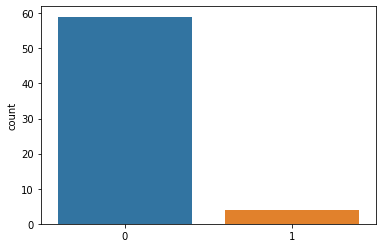

In [16]:
x = find.drop(columns=["molecule_name","class"])
li = log.predict(x)
sns.countplot(li)
